# Grid Traversal

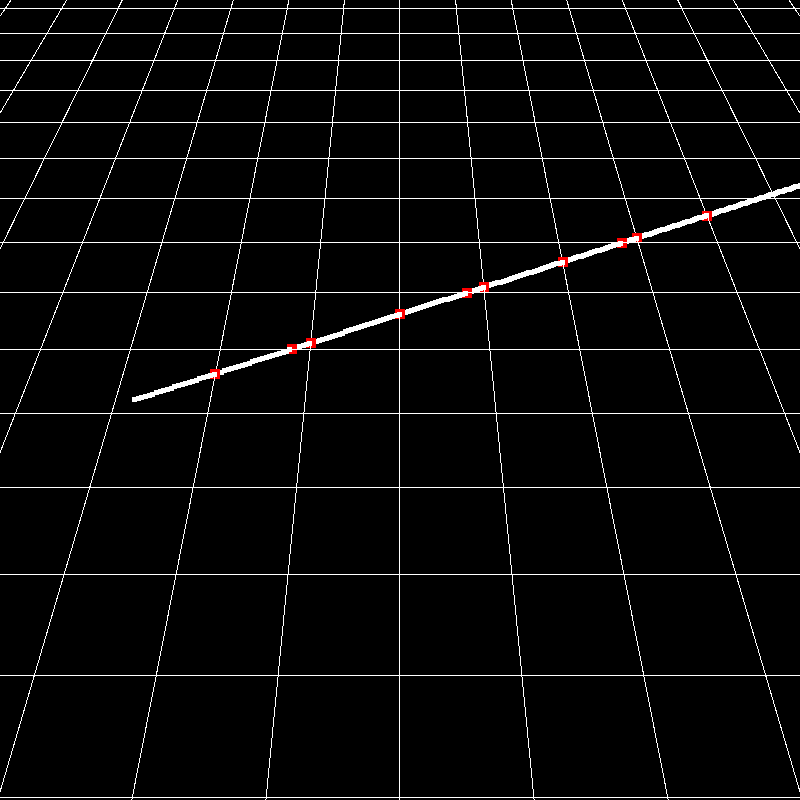

In [1]:
import os
import sys
import pathlib

parentdir = os.path.dirname(pathlib.Path().resolve())

sys.path.insert(0, parentdir) 

import run_example

name = run_example.ScreenShotExample(os.path.abspath(pathlib.Path().resolve()), capture_frame=40)

from IPython.display import Image

Image(filename=f'Documentation/{name}.png')

A fairly common problem we need to deal with is iterating over the cells of a cartesian grid 
in the order imposed by a line. That is, a line crosses a certain number of cells and we want 
to visit each one in the order the line crosses each cell. Similar to the above image. 
There is a very efficient way to do this.

Let's first assume that instead of a grid we have a set of axis aligned parallel lines (or planes in higher dimensions). 
Our line, assuming it is not parallel to the lines/planes *has* to intersect each one and we can prove it.

A parametric line is defined as $p + td$ where $p$ is a point in the line, $t$ a scalar parameter and $d$  
the direction of the line. Without loss of generality we can assume the lines/planes are aligned with the x axis 
(i.e. they are the sets defined by $x=kw$ with $k \in \mathbb{N}$, $w \in \mathbb{R}^+$. $w$ is the space between lines,
$k$ is the index of the line).

We need to know how much along the line (i.e. the parameter $t$) we need to move to intersect the next parallel line.

Consider the vector $d=\left[ \begin{smallmatrix} c_1\\ \vdots \\ c_n \end{smallmatrix} \right]$.
By definition, the value $c_1$ is the component of $d$ in the $x$ direction. The space between lines is, by definition,
$w$ thus if we start on any one parallel line satifying $x=k_iw$ the next parallel line is at $x=(k_i+1)w$.
If our line's starting point is on the first parallel then the next intersection is given by:

$$k_iw + tc_1 = k_iw + w$$

Solving for $t$ yields:

$$\boxed{t = \frac{w}{c_1}}$$

This gives us the parameter needed to move from the left parallel to the right one and notice how it is the same regardless of which
parallel we pick!

A more visual way to think about this is on the below diagram. A line crosses our parallel lines and intersects them at the blue points, the $x$ distance between each point (i.e. the length of the red line) is exactly the same between any 2 lines.


In [3]:
import pathlib
import os, sys
from IPython.display import SVG, display, HTML
from IPython.display import clear_output

parent = os.path.dirname(pathlib.Path().resolve())

sys.path.append(parent)
from diagram_utils import *

c.items.clear()
c.layers.clear()

scale = 5

slope = 0.7
offset = -2
for i in range(6):
    DrawLine(np.array((i, -2)) * scale, np.array((i, 2)) * scale, stroke=SOLID_LINE, width=0.02 * scale)

DrawLine(np.array((0, offset)) * scale, np.array((5, 5 * slope + offset)) * scale, stroke=SOLID_LINE, width=0.02 * scale)

for i in range(5):
    point = (i * scale, (i * slope + offset) * scale)
    DrawLine(point, ((point[0] + 1 * scale), point[1]), stroke=SOLID_LINE, width=0.02 * scale, tcolor=(1,0,0))
    
for i in range(6):
    point = (i * scale, (i * slope + offset) * scale)
    DrawPoint(point, 0.05 * scale, tcolor=light_blue)

pathlib.Path("Documentation").mkdir(parents=True, exist_ok=True)
image_path = os.path.join("Documentation", f"slice_view_0")
c.writeSVGfile(image_path)

display(HTML(f"<table><tr><td><img src='Documentation/slice_view_0.svg'></td></tr></table>"))

The exact same pattern occurs for a $y$ aligned set of parallels.

In [15]:
import pathlib
import os, sys
from IPython.display import SVG, display, HTML
from IPython.display import clear_output

parent = os.path.dirname(pathlib.Path().resolve())

sys.path.append(parent)
from diagram_utils import *

c.items.clear()
c.layers.clear()

scale = 5
slope = 0.7
offset = -2
for i in range(-1, 5):
    DrawLine(np.array((0, i-1)) * scale, np.array((6, i-1)) * scale, stroke=SOLID_LINE, width=0.02 * scale)

DrawLine(np.array((0, offset)) * scale, np.array((6, 6 * slope + offset)) * scale, stroke=SOLID_LINE, width=0.02 * scale)

for i in range(-1, 3):
    point = ((i - offset) * scale / slope, i * scale)
    DrawLine(point, ((point[0]), point[1] + 1 * scale), stroke=SOLID_LINE, width=0.02 * scale, tcolor=(1,0,0))
    
for i in range(-1, 3):
    point = ((i - offset) * scale / slope, i * scale)
    DrawPoint(point, 0.05 * scale, tcolor=light_green)

pathlib.Path("Documentation").mkdir(parents=True, exist_ok=True)
image_path = os.path.join("Documentation", f"slice_view_1")
c.writeSVGfile(image_path)

display(HTML(f"<table><tr><td><img src='Documentation/slice_view_1.svg'></td></tr></table>"))

Now let us super impose both diagrams on top of each other:

In [16]:
import pathlib
import os, sys
from IPython.display import SVG, display, HTML
from IPython.display import clear_output
from math import *

parent = os.path.dirname(pathlib.Path().resolve())

sys.path.append(parent)
from diagram_utils import *

c.items.clear()
c.layers.clear()

scale = 4
slope = 0.7
offset = -2

for i in range(-1, 3):
    DrawSquare((floor((i - offset) / slope) * scale, i * scale), 1 * scale, fill_color=light_green, alpha=0, outline=False)

for i in range(6):
    DrawSquare((i * scale, floor(i * slope + offset) * scale), 1 * scale, fill_color=light_blue, alpha=0, outline=False)
    
for i in range(7):
    DrawLine(np.array((i, -2)) * scale, np.array((i, 3)) * scale, stroke=SOLID_LINE, width=0.02 * scale)

for i in range(-1, 5):
    DrawLine(np.array((0, i-1)) * scale, np.array((6, i-1)) * scale, stroke=SOLID_LINE, width=0.02 * scale)

DrawLine(np.array((0, offset)) * scale, np.array((6, 6 * slope + offset)) * scale, stroke=SOLID_LINE, width=0.02 * scale)

for i in range(6):
    point = (i * scale, (i * slope + offset) * scale)
    DrawPoint(point, 0.05 * scale, tcolor=light_blue)
    
for i in range(-1, 3):
    point = ((i - offset) * scale / slope, i * scale)
    DrawPoint(point, 0.05 * scale, tcolor=light_green)

pathlib.Path("Documentation").mkdir(parents=True, exist_ok=True)
image_path = os.path.join("Documentation", f"slice_view_2")
c.writeSVGfile(image_path)

display(HTML(f"<table><tr><td><img src='Documentation/slice_view_2.svg'></td></tr></table>"))

Note how the $x$ distance between the blue points remains the same and the $y$ distance between the green points also remains the same. Notice as well how every point corresponds to a single discrete cell in the grid. Thus if we want to visit each cell exactly once in this order, we can use the points to calculate the indices of the current cell. 

We do so as follows. Assume we know the discrete index of the starting cell, label it $(i_0, j_0)$ and the coordinates of the staring point within that cell $(x_0, y_0)$. We first want to know if the line first forsses a vertical boundary (in which case the $i_0$ index increases) or a horizontal boundary (in which case $j_0$ increases).

We will keep track of the distance travelled along $d_x$ and along $d_y$ (the canonical directions).

In the specific example above (and we will generalize it to other cases in a moment) the starting distances are $d_x=d_y=0$.

We also know that the first cross of a vertical line occurs after travelling $t_x = \frac{w}{c_1}$ units (by our prior calculations). The first cross of a horizontal line occurs after travelling $t_y = \frac{w}{c_2}$ units.

It should be obvious then, that the first boundary we cross is whichever one is closer to the starting point, i.e. the one corresponding to the minimum between $t_x, t_y$. In our example that is a vertical cross (a blue cell).

So now we have moved $t_x = \frac{w}{c_1}$ units and find ourselves in the second blue cell in the bottom left. In this case the closer crossing occurs on a horizontal line and we move to a green cell, and update our $t_y=\frac{w}{c_2}$. Note that it is not necessarily alternating all the time, sometimes we move from green to blue to green, but sometimes we move through multiple blue cells before reaching a green one.

Because we are looking for the closest crossing, what we need to do is compare the total distance we have travelled along the vertical crossings ($t_x$) and the total distance travelled along the horizontal crossings ($t_y$). We always move and update *only* the smaller of the 2 distances. 

What we are seeking is the coefficient $t$ at which the line intersects either set of parallels (horizontal or vertical), thus what we are interested in is, "would moving along x one more time be less than or greater than moving along y one more time".

In pseudo-python this would look like this:

```python
# =====================================================

# Inputs
w # cell width
d # direction vector
s # starting point
index = (i, j) # The discrete coordinate of the starting cell

# =====================================================

# Find the magnitude of the components of the direction vector
deltas = (0, 0)
deltas[0] = width / abs(d[0])
deltas[1] = width / abs(d[1])

# Initialize the AA distances
distances = (0, 0)
current_point = s

for iteration_count:
    t = min(distances)
    k = arg min(distances) # index of smallest distance
    
    distances[k] += deltas[k]
    current_point = s + t * d
    index[k] += sign(d[k])
    
    if current_point is out of bounds:
        break;
```

A few things to note. First since the components of the direction vector could be negative, we use the absolute value to ignore the sign as we care about the positive distance $t$ we need to travel along $d$, thus up to a choice of basis we can just ignore the sign. The only point where the sign matters is if we need to increment or decrement the index of the current cell.

The other thing to note is that, so far, we assumed the starting point is always grid aligned, which, of course, is not true in the general case. Consider this example:

In [31]:
import pathlib
import os, sys
from IPython.display import SVG, display, HTML
from IPython.display import clear_output
from math import *

parent = os.path.dirname(pathlib.Path().resolve())

sys.path.append(parent)
from diagram_utils import *

c.items.clear()
c.layers.clear()

scale = 4
slope = 0.7
offset = -2
  
for i in range(7):
    DrawLine(np.array((i, -2)) * scale, np.array((i, 3)) * scale, stroke=SOLID_LINE, width=0.02 * scale)

for i in range(-1, 5):
    DrawLine(np.array((0, i-1)) * scale, np.array((6, i-1)) * scale, stroke=SOLID_LINE, width=0.02 * scale)

DrawLine(np.array((1.5, 0.3)) * scale, np.array((4.3, 2.7)) * scale, stroke=SOLID_LINE, width=0.02 * scale)
DrawPoint(np.array((1.5, 0.3)) * scale, 0.05 * scale, tcolor=light_blue)

pathlib.Path("Documentation").mkdir(parents=True, exist_ok=True)
image_path = os.path.join("Documentation", f"slice_view_3")
c.writeSVGfile(image_path)

display(HTML(f"<table><tr><td><img src='Documentation/slice_view_3.svg'></td></tr></table>"))

Clearly the starting point is not aligned with either grid, however note that aside from the endpoints, all other points still obey the rule that vertical intersections are equally spaced and so are horizontal intersections. 

Thus it's only the first iteration that needs to be handled differently, all we need to do is figure out how much we need to move in each direction so that our line intersects either set of lines. 

If the direction component $c_i$ is positive, then we need to travel $\frac{w - s_i}{c_i}$ ($s_i$ being the starting coordinate) units. If it is negative we need to travel $\frac{s_i}{c_i}$ units.

In [27]:
import pathlib
import os, sys
from IPython.display import SVG, display, HTML
from IPython.display import clear_output
from math import *

parent = os.path.dirname(pathlib.Path().resolve())

sys.path.append(parent)
from diagram_utils import *

c.items.clear()
c.layers.clear()

scale = 8
slope = 0.7
offset = -2
  
for i in range(2):
    DrawLine(np.array((i, 0)) * scale, np.array((i, 1)) * scale, stroke=SOLID_LINE, width=0.02 * scale)

for i in range(2):
    DrawLine(np.array((0, i)) * scale, np.array((1, i)) * scale, stroke=SOLID_LINE, width=0.02 * scale)

DrawSquare((0, 0), 1 * scale, fill_color=light_blue, alpha=1, outline=False)
point = np.array((0.4, 0.6)) * scale

DrawArrow(point, point + np.array([0.6, 0]) * scale, tcolor=dark_blue, cap_size=0.01 * scale, width=0.02 * scale)
DrawArrow(point + np.array([0.6, 0]) * scale, point + np.array([0.05, 0]) * scale, tcolor=dark_blue, cap_size=0.012 * scale, width=0.02 * scale)

DrawText((0.75 * scale, 0.55 * scale), r"$w - s_1$", tcolor=(0, 0, 0), scale=scale / 3)

DrawArrow(point, point - np.array([0.4, 0]) * scale, tcolor=dark_blue, cap_size=0.015 * scale, width=0.02 * scale)
DrawArrow(point - np.array([0.4, 0]) * scale, point - np.array([0.05, 0]) * scale, tcolor=dark_blue, cap_size=0.017 * scale, width=0.02 * scale)

DrawText((0.2 * scale, 0.49 * scale), r"$s_1$", tcolor=(0, 0, 0), scale=scale / 3)

DrawArrow(point, point + np.array([0, 0.4]) * scale, tcolor=dark_green, cap_size=0.015 * scale, width=0.02 * scale)
DrawArrow(point + np.array([0, 0.4]) * scale, point + np.array([0, 0.05]) * scale, tcolor=dark_green, cap_size=0.018 * scale, width=0.02 * scale)

DrawText((0.6 * scale, 0.8 * scale), r"$w - s_2$", tcolor=(0, 0, 0), scale=scale / 3)

DrawArrow(point, point - np.array([0, 0.6]) * scale, tcolor=dark_green, cap_size=0.01 * scale, width=0.02 * scale)
DrawArrow(point - np.array([0, 0.6]) * scale, point - np.array([0, 0.05]) * scale, tcolor=dark_green, cap_size=0.012 * scale, width=0.02 * scale)

DrawText((0.5 * scale, 0.25 * scale), r"$s_2$", tcolor=(0, 0, 0), scale=scale / 3)

DrawPoint(point, 0.05 * scale, tcolor=light_blue)

pathlib.Path("Documentation").mkdir(parents=True, exist_ok=True)
image_path = os.path.join("Documentation", f"slice_view_4")
c.writeSVGfile(image_path)

clear_output()
display(HTML(f"<table><tr><td><img src='Documentation/slice_view_4.svg'></td></tr></table>"))

Then we just need to slightly edit our prior algorithm:

```python
# =====================================================

# Inputs
width # cell width
d # direction vector
s # starting point
index = (i, j) # The discrete coordinate of the starting cell

# =====================================================

# Find the magnitude of the components of the direction vector
deltas = (0, 0)
deltas[0] = width / abs(d[0])
deltas[1] = width / abs(d[1])

# Initialize the AA distances
distances = (0, 0)
distances[0] = s[0] / abs(d[0]) if dir[0] < 0 else (width -  s[0]) / abs(d[0])
distances[1] = s[1] / abs(d[1]) if dir[1] < 0 else (width -  s[1]) / abs(d[1])

current_point = s

for iteration_count:
    t = min(distances)
    k = arg min(distances) # index of smallest distance
    
    distances[k] += deltas[k]
    current_point = s + t * d
    index[k] += sign(d[k])
    
    if current_point is out of bounds:
        break;
```